# Monk Object Detection - Anwendung auf den Datensatz BDD100K

### Projektgruppe Fahrassistenzsysteme, M.Sc. Angewandte KI, 05/2023

# Installation

In [ ]:
# Clonen des Git-Repositories

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 10565, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 10565 (delta 18), reused 21 (delta 8), pack-reused 10525
Receiving objects: 100% (10565/10565), 260.88 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (4710/4710), done.
Updating files: 100% (8428/8428), done.


In [ ]:
# Installation der notwendigen Abhängigkeiten auf Google Colab

In [ ]:
! cd Monk_Object_Detection/13_tf_obj_2/installation 
&& chmod +x install_colab.sh && ./install_colab.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Ausgabe der verwendeten Tensorflow-Version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Verwendung eines vortrainierten Netzes

## Download des Netzes

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget 
--save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 
'https://docs.google.com/uc?export=download&id=1ukYu1AVfQ5SAmKeiXXYM9vvZJN6ZaV4Q' 
-O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ukYu1AVfQ5SAmKeiXXYM9vvZJN6ZaV4Q" 
-O obj_bdd_trained.zip && rm -rf /tmp/cookies.txt

--2023-05-22 17:09:55--  https://docs.google.com/uc?export=download&id=1ukYu1AVfQ5SAmKeiXXYM9vvZJN6ZaV4Q
Resolving docs.google.com (docs.google.com)... 74.125.24.102, 74.125.24.101, 74.125.24.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   2.23K  --.-KB/s    in 0s      

2023-05-22 17:09:55 (64.8 MB/s) - written to stdout [2281]

--2023-05-22 17:09:55--  https://docs.google.com/uc?export=download&confirm=t&id=1ukYu1AVfQ5SAmKeiXXYM9vvZJN6ZaV4Q
Resolving docs.google.com (docs.google.com)... 74.125.24.102, 74.125.24.101, 74.125.24.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qesmhafb1la9vn33di0bdobl65c59

In [ ]:
! unzip -qq obj_bdd_trained.zip

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget 
--save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 
'https://docs.google.com/uc?export=download&id=1nEkL_0yx0jEbS08oMOg-5qSIqsz8Bj4x' 
-O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nEkL_0yx0jEbS08oMOg-5qSIqsz8Bj4x" 
-O labelmap.txt && rm -rf /tmp/cookies.txt

--2023-05-22 17:10:07--  https://docs.google.com/uc?export=download&id=1nEkL_0yx0jEbS08oMOg-5qSIqsz8Bj4x
Resolving docs.google.com (docs.google.com)... 74.125.24.102, 74.125.24.101, 74.125.24.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ug5lms2f6ic5q8tri0jl3761fbqt4fud/1684775400000/10938243485722110558/*/1nEkL_0yx0jEbS08oMOg-5qSIqsz8Bj4x?e=download&uuid=c9a4214f-3042-401d-a7f4-fa04bd3a39cc [following]
--2023-05-22 17:10:07--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ug5lms2f6ic5q8tri0jl3761fbqt4fud/1684775400000/10938243485722110558/*/1nEkL_0yx0jEbS08oMOg-5qSIqsz8Bj4x?e=download&uuid=c9a4214f-3042-401d-a7f4-fa04bd3a39cc
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 142.251.10.132, 2404:6800:4003

## Inference Engine

In [ ]:
import os
import sys
from IPython.display import Image
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")
from infer_detector import Infer

In [ ]:
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [ ]:
from infer_detector import Infer

In [ ]:
inf = Infer()
inf.set_model_params(exported_model_dir = 'obj_bdd_trained/export_dir')

In [ ]:
inf.set_model_params(exported_model_dir = 'obj_bdd_trained/export_dir')

In [ ]:
# Beispielvorhersage, Schwellenwert der Wahrscheinlichkeit = 50%

Image loading and preproc time - 0.027635812759399414
Inference time - 11.298790216445923
Extracting results and priting on image time - 0.03630685806274414


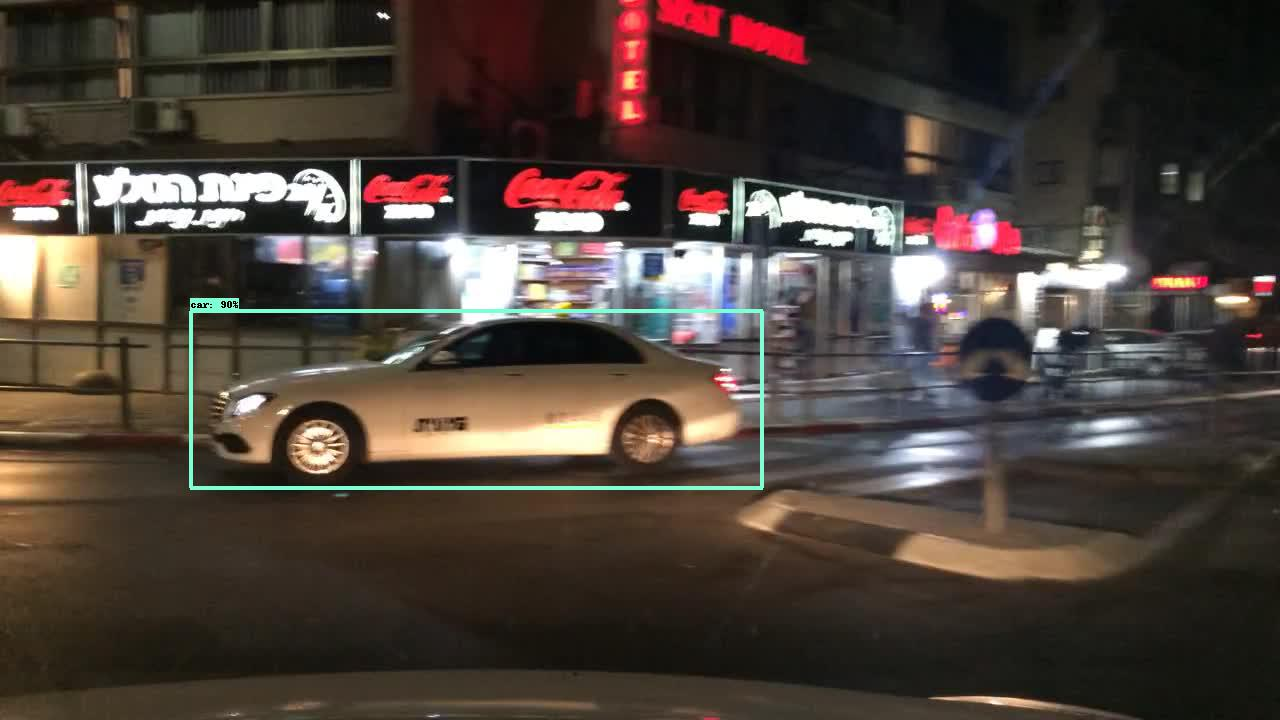

In [ ]:
scores, bboxes, labels = inf1.infer_on_image('obj_bdd_trained/test/1.jpg', thresh=0.5)
Image(filename='output.jpg') 

In [ ]:
# Beispielvorhersage, Schwellenwert der Wahrscheinlichkeit = 25%

Image loading and preproc time - 0.03316783905029297
Inference time - 0.12308120727539062
Extracting results and priting on image time - 0.11992645263671875


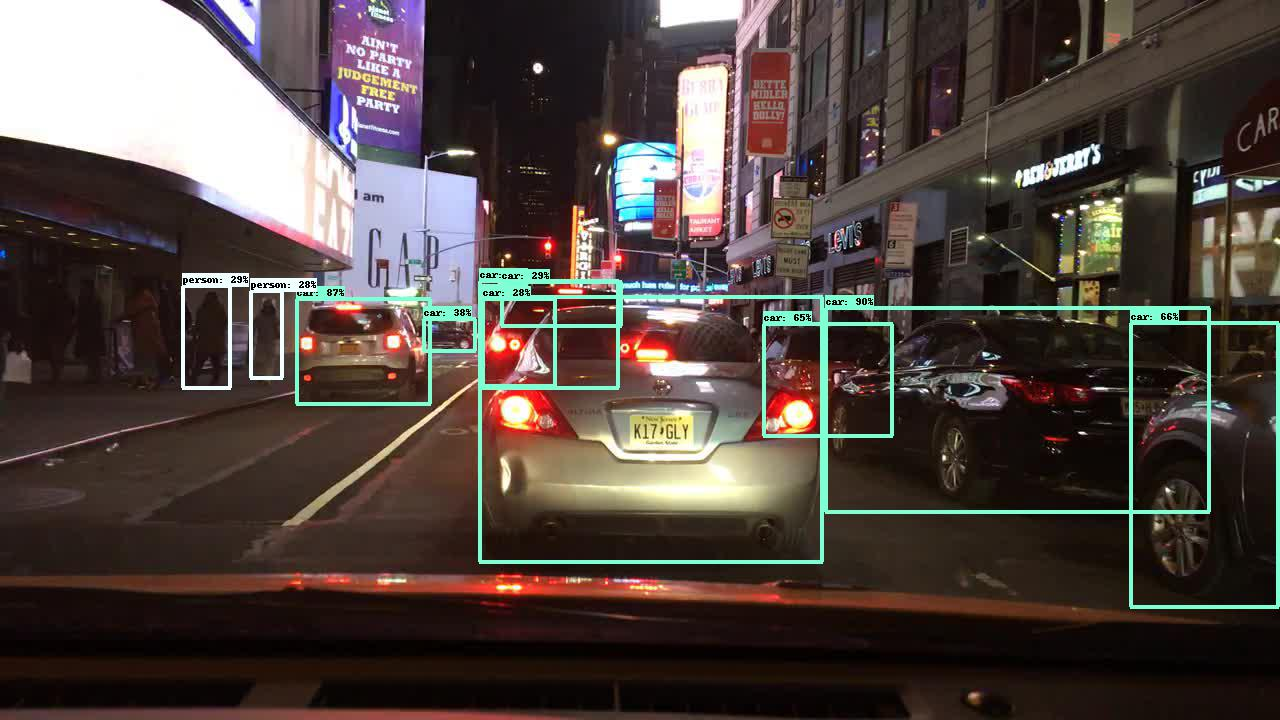

In [ ]:
scores, bboxes, labels = inf1.infer_on_image('obj_bdd_trained/test/2.jpg', thresh=0.25)
Image(filename='output.jpg') 

## Optimierung TensorRT

# Eigenes Training

## Download des Datensatzes

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Einrichtung Kaggle-API-Token

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"XXXXXXXXX","key":"XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download des Datensatzes von Kaggle

In [ ]:
! kaggle datasets download solesensei/solesensei_bdd100k

100% 7.61G/7.61G [04:32<00:00, 32.4MB/s]
100% 7.61G/7.61G [04:32<00:00, 30.0MB/s]


In [ ]:
! unzip -qq solesensei_bdd100k.zip 

In [ ]:
ls bdd100k/bdd100k

images/


In [ ]:
ls bdd100k_labels_release/bdd100k/labels

bdd100k_labels_images_train.json  bdd100k_labels_images_val.json


## Transformation in Pascal VOC Format

In [ ]:
# Erstellung Verzeichnis

In [ ]:
! pip install pascal-voc-writer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir dataset

! mkdir dataset/train/
! mkdir dataset/train/annos/

! mkdir dataset/val/
! mkdir dataset/val/annos/

### Trainingsdaten

In [ ]:
import json
from pascal_voc_writer import Writer
import os
from tqdm import tqdm
import cv2

In [ ]:
# Zusammenschieben der Trainingsdaten

In [ ]:
! find bdd100k/bdd100k/images/100k/train/trainA/ -name '*.jpg*' 
-exec mv {} bdd100k/bdd100k/images/100k/train/ \;
! find bdd100k/bdd100k/images/100k/train/trainB/ -name '*.jpg*' 
-exec mv {} bdd100k/bdd100k/images/100k/train/ \;
! find bdd100k/bdd100k/images/100k/train/testA/ -name '*.jpg*' 
-exec mv {} bdd100k/bdd100k/images/100k/train/ \;
! find bdd100k/bdd100k/images/100k/train/testB/ -name '*.jpg*' 
-exec mv {} bdd100k/bdd100k/images/100k/train/ \;

In [ ]:
# Verzeichnis-Pfade

In [ ]:
img_dir = "bdd100k/bdd100k/images/100k/train/"
anno_file = "bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json"
output_dir = "dataset/train/annos/"

In [ ]:
# Einlesen der JSON-Datei

In [ ]:
with open(anno_file) as json_file:
    data_train = json.load(json_file)

In [ ]:
len(data_train)

69863

In [ ]:
data_train[0].keys()

dict_keys(['name', 'attributes', 'timestamp', 'labels'])

In [ ]:
# Datentransformation in XML

In [ ]:
for i in tqdm(range(len(data_train))):
    name = data_train[i]["name"];
    labels = data_train[i]["labels"];
    img = cv2.imread(img_dir + "/" + name);
    h, w, c = img.shape;
    writer = Writer(name, w, h)
    for j in range(len(labels)):
        obj = labels[j];
        if("box2d" in obj.keys()):
            category = obj["category"];
            x1 = int(obj["box2d"]["x1"]);
            y1 = int(obj["box2d"]["y1"]);
            x2 = int(obj["box2d"]["x2"]);
            y2 = int(obj["box2d"]["y2"]);
            writer.addObject(category, x1, y1, x2, y2);
    
    writer.save(output_dir + "/" + name.split(".")[0] + ".xml")

100%|██████████| 69863/69863 [16:13<00:00, 71.73it/s]


### Validierungsdaten

In [ ]:
# Verzeichnis-Pfade

In [ ]:
img_dir = "bdd100k/bdd100k/images/100k/val/"
anno_file = "bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json"
output_dir = "dataset/val/annos/"

In [ ]:
# Datentransformation in XML

In [ ]:
# Einlesen der JSON-Datei

In [ ]:
with open(anno_file) as json_file:
    data_val = json.load(json_file)

In [ ]:
len(data_val)

10000

In [ ]:
for i in tqdm(range(len(data_val))):
    name = data_val[i]["name"];
    labels = data_val[i]["labels"];
    img = cv2.imread(img_dir + "/" + name);
    h, w, c = img.shape;
    writer = Writer(name, w, h)
    for j in range(len(labels)):
        obj = labels[j];
        if("box2d" in obj.keys()):
            category = obj["category"];
            x1 = int(obj["box2d"]["x1"]);
            y1 = int(obj["box2d"]["y1"]);
            x2 = int(obj["box2d"]["x2"]);
            y2 = int(obj["box2d"]["y2"]);
            writer.addObject(category, x1, y1, x2, y2);
    
    writer.save(output_dir + "/" + name.split(".")[0] + ".xml")

100%|██████████| 10000/10000 [02:21<00:00, 70.57it/s]


### Klassen / Labels

In [ ]:
# Verzeichnis-Pfad

In [ ]:
# Einlesen der JSON-Datei

In [ ]:
# Datentransformation in Listen-Objekt

In [ ]:
anno_file = "bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json"

In [ ]:
with open(anno_file) as json_file:
    data = json.load(json_file)

In [ ]:
classes = []

for i in tqdm(range(len(data))):
    name = data[i]["name"]
    labels = data[i]["labels"]
    for j in range(len(labels)):
        obj = labels[j]
        if("box2d" in obj.keys()):
            category = obj["category"]
            if(category not in classes):
                classes.append(category)

100%|██████████| 69863/69863 [00:01<00:00, 41937.01it/s]


In [ ]:
classes

['traffic light',
 'traffic sign',
 'car',
 'person',
 'bus',
 'truck',
 'rider',
 'bike',
 'motor',
 'train']

In [ ]:
f = open("classes.txt", 'w')
for i in range(len(classes)):
    f.write(classes[i] + "\n")
f.close()

In [ ]:
# Schreiben der Daten in Text-Datei

## Train Engine

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")
from train_detector import Detector

In [ ]:
det = Detector()

In [ ]:
# Liste der verfügbaren Modell-Architekturen

In [ ]:
det.list_models()

1. Model Name: ssd_mobilenet_v2_320
2. Model Name: ssd_mobilenet_v1_fpn_640
3. Model Name: ssd_mobilenet_v2_fpnlite_320
4. Model Name: ssd_mobilenet_v2_fpnlite_640
5. Model Name: ssd_resnet50_v1_fpn_320
6. Model Name: ssd_resnet50_v1_fpn_640
7. Model Name: ssd_resnet101_v1_fpn_320
8. Model Name: ssd_resnet101_v1_fpn_640
9. Model Name: ssd_resnet152_v1_fpn_320
10. Model Name: ssd_resnet152_v1_fpn_640
11. Model Name: faster_rcnn_resnet50_v1_640
12. Model Name: faster_rcnn_resnet50_v1_1024
13. Model Name: faster_rcnn_resnet101_v1_640
14. Model Name: faster_rcnn_resnet101_v1_1024
15. Model Name: faster_rcnn_resnet152_v1_640
16. Model Name: faster_rcnn_resnet152_v1_1024
17. Model Name: faster_rcnn_inception_resnet_v2_640
18. Model Name: faster_rcnn_inception_resnet_v2_1024
19. Model Name: efficientdet_d0
20. Model Name: efficientdet_d1
21. Model Name: efficientdet_d2
22. Model Name: efficientdet_d3
23. Model Name: efficientdet_d4
24. Model Name: efficientdet_d5
25. Model Name: efficientdet_

In [ ]:
# Festlegung der Trainingsdaten

In [ ]:
# Festlegung der Validierungsdaten

In [ ]:
train_img_dir = "bdd100k/bdd100k/images/100k/train/";
train_anno_dir = "dataset/train/annos/";
class_list_file = "classes.txt";

det.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=4)

In [ ]:
val_img_dir = "bdd100k/bdd100k/images/100k/val/";
val_anno_dir = "dataset/val/annos/";

det.set_val_dataset(val_img_dir, val_anno_dir)

In [ ]:
# Erstellung der Datensätze als TF Records

In [ ]:
det.create_tfrecord(data_output_dir="data_tfrecord")

Reading training dataset.


  0%|          | 0/69863 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/object_detection/utils/dataset_util.py:79: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:
100%|██████████| 69863/69863 [05:04<00:00, 229.79it/s]


Reading validation dataset.


100%|██████████| 10000/10000 [00:29<00:00, 334.05it/s]


In [ ]:
# Festlegung der Modell-Architektur

In [ ]:
det.set_model_params(model_name="ssd_resnet50_v1_fpn_640")

Model Download
Model name set as ssd_resnet50_v1_fpn_640x640_coco17_tpu-8


In [ ]:
# Festlegung der Hyperparameter

In [ ]:
det.set_hyper_params(num_train_steps=10000, lr=0.03)

In [ ]:
# Angabe des Export-Verzeichnisses

In [ ]:
det.export_params(output_directory="export_dir")

In [ ]:
# Durchführung des Trainings
# tf.app.run() führt Funktion sys.exit() aus und kann deshalb nicht im Jupyter-Notebook-Verzeichnis ausgeführt werden

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/train.py

W0521 09:36:53.420650 140023211484992 deprecation.py:364] From /content/Monk_Object_Detection/13_tf_obj_2/lib/train.py:34: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
Instructions for updating:
use distribute.MultiWorkerMirroredStrategy instead
W0521 09:36:53.422882 140023211484992 collective_all_reduce_strategy.py:395] Collective ops is not configured at program startup. Some performance features may not be enabled.
I0521 09:36:53.707746 140023211484992 collective_all_reduce_strategy.py:447] Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0',), communication = CommunicationImplementation.AUTO
I0521 09:36:53.726099 140023211484992 config_util.py:552] Maybe overwriting train_steps: 10000
I0521 09:36:53.728163 140023211484992 config_util.py:552] Maybe overwriting use_bfloat16: False
W0521 09:36:53.791197 140023211484992 deprecation.p

In [ ]:
# Exportieren des trainierten Modells
# tf.app.run() führt Funktion sys.exit() aus und kann deshalb nicht im Jupyter-Notebook-Verzeichnis ausgeführt werden

In [ ]:
%run Monk_Object_Detection/13_tf_obj_2/lib/export.py

W0521 11:43:11.882716 140023211484992 save_impl.py:66] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f5542361a50>, because it is not built.
W0521 11:43:34.540347 140023211484992 save.py:274] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 278). These functions will not be directly callable after loading.
I0521 11:45:41.339398 140023211484992 builder_impl.py:797] Assets written to: export_dir/saved_model/assets
I0521 11:45:44.082031 140023211484992 config_util.py:253] Writing pipeline config file to export_dir/pipeline.config


In [ ]:
# Zippen des exportierten Modells und Download von Colab
# Zur Datensicherung, damit das Training nicht nochmals durchgeführt werden muss

In [ ]:
#!zip -r export_dir.zip export_dir

  adding: export_dir/ (stored 0%)
  adding: export_dir/pipeline.config (deflated 68%)
  adding: export_dir/saved_model/ (stored 0%)
  adding: export_dir/saved_model/assets/ (stored 0%)
  adding: export_dir/saved_model/saved_model.pb (deflated 93%)
  adding: export_dir/saved_model/variables/ (stored 0%)
  adding: export_dir/saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: export_dir/saved_model/variables/variables.index (deflated 80%)
  adding: export_dir/saved_model/fingerprint.pb (stored 0%)
  adding: export_dir/checkpoint/ (stored 0%)
  adding: export_dir/checkpoint/ckpt-0.data-00000-of-00001 (deflated 7%)
  adding: export_dir/checkpoint/checkpoint (deflated 42%)
  adding: export_dir/checkpoint/ckpt-0.index (deflated 82%)


In [ ]:
#from google.colab import files
#files.download("export_dir.zip")

## Inference Engine

In [ ]:
import os
import sys
from IPython.display import Image

In [ ]:
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
gtf.set_model_params(exported_model_dir = 'export_dir')

In [ ]:
img_list = os.listdir("bdd100k/bdd100k/images/100k/test/")

In [ ]:
len(img_list)

293

Image loading and preproc time - 0.03291130065917969
Inference time - 10.31515884399414
Extracting results and priting on image time - 0.02989339828491211


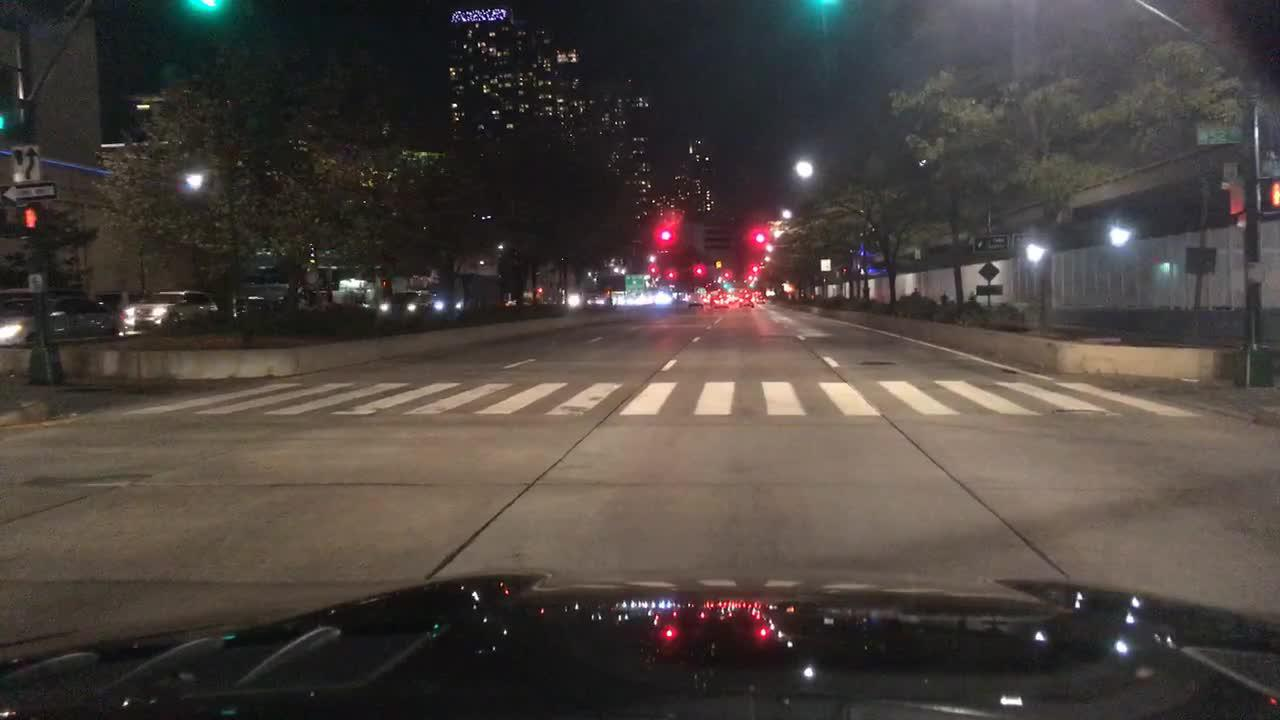

In [ ]:
scores, bboxes, labels = gtf.infer_on_image('bdd100k/bdd100k/images/100k/test/' + img_list[0], thresh=0.5);
Image(filename='output.jpg') 

Image loading and preproc time - 0.019381046295166016
Inference time - 0.06669449806213379
Extracting results and priting on image time - 0.06085395812988281


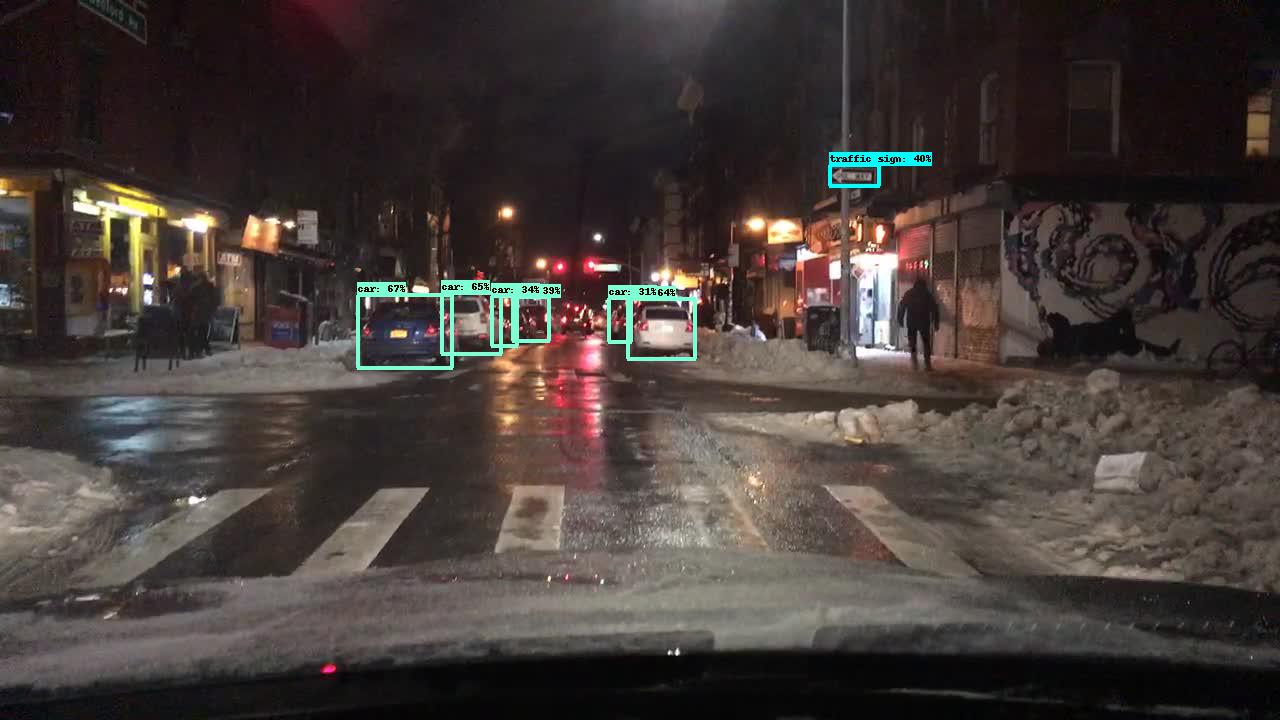

In [ ]:
scores, bboxes, labels = gtf.infer_on_image('bdd100k/bdd100k/images/100k/test/' + img_list[10], thresh=0.3);
Image(filename='output.jpg') 

In [ ]:
# Inferenz-Geschwindigkeit des Modells

In [ ]:
gtf.benchmark_for_speed('bdd100k/bdd100k/images/100k/test/' + img_list[10])

Average Image loading time: 0.017861077785491942
Average Inference time: 0.10160265922546387
Result extraction time: 0.07606214046478271
total_time = 10.160265922546387
images_per_sec = 10
99th_percentile = 136.7049217224121
latency_mean  = 101.60265922546387
latency_median = 98.59025478363037
latency_min = 74.24116134643555


## Optimierung TensorRT

In [ ]:
#%run Monk_Object_Detection/13_tf_obj_2/lib/optimize.py